In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
#----------------------------------------#
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#----------------------------------------#
name = 'RJS0019'

In [3]:
data2 = np.fromfile('RJS0019_mario.dat',dtype=float, count=-1, sep='	')

p2  = len(data2)/14
filef  = np.reshape(data2, (len(data2)/14,14))

print (shape(filef),' = forma da matriz de valores')
#--------------------------------------------------------------------------------------------------------------------#

X    = filef[:,0]
Y    = filef[:,1]
prof = filef[:,2]   # profundidade
DTP  = filef[:,3]   # sonico 
GR   = filef[:,4]     # gama ray
ILD  = filef[:,5]    # resistividade
PHIN = filef[:,6]   # porosidade neutronica
RHOb = filef[:,7]   # densidade

#----------------Siqueira----------------------#

z_imp  = filef[:,8]  # Impedancia acustica
R      = filef[:,9]    # Refletividade
signal = filef[:,10] # Sismograma sintetico

p = 1313

(1313, 14)  = forma da matriz de valores


In [4]:
#-------------------------------Litologia RJS0019-----------------------------------#
are = [0]*p
sil = [0]*p
mar = [0]*p
arg = [0]*p
mao = [0]*p


for i in range (p):
    if prof[i] >= 2951.0 and prof[i] < 2963.7725:
        sil[i] = 70
    #------------------------------------------#
    if prof[i] >= 2963.7725 and prof[i] < 2965.2695:
        are[i] = 90
    if prof[i] >= 2967.9640 and prof[i] < 2969.7605:
        are[i] = 90
    if prof[i] >= 2971.2575 and prof[i] < 2973.0539:
        are[i] = 90
    if prof[i] >= 2975.1497 and prof[i] < 2994.6108:
        are[i] = 90
    if prof[i] >= 3001.4970 and prof[i] < 3003.5928:
        are[i] = 90
    if prof[i] >= 3006.5868 and prof[i] < 3008.3832:
        are[i] = 90
    if prof[i] >= 3009.5808 and prof[i] < 3013.1737:
        are[i] = 90
    if prof[i] >= 3014.9701 and prof[i] < 3018.8623:
        are[i] = 90
    if prof[i] >= 3020.6587 and prof[i] < 3022.4551:
        are[i] = 90
    if prof[i] >= 3034.7305 and prof[i] < 3037.4252:
        are[i] = 90
    if prof[i] >= 3057.4850 and prof[i] < 3081.1377:
        are[i] = 90
    if prof[i] >= 3085.0299 and prof[i] < 3087.1257:
        are[i] = 90
    if prof[i] >= 3098.000 and prof[i] < 3103.000:
        are[i] = 90
    if prof[i] >= 3107.000 and prof[i] < 3110.1796:
        are[i] = 90
    #------------------------------------------#
    if prof[i] >= 2973.0539 and prof[i] < 2975.1497:
        arg[i] = 50
    if prof[i] >= 3003.5928 and prof[i] < 3006.5868:
        arg[i] = 50
    if prof[i] >= 3008.3832 and prof[i] < 3009.5808:
        arg[i] = 50
    if prof[i] >= 3013.1737 and prof[i] < 3014.9701:
        arg[i] = 50
    if prof[i] >= 3018.8623 and prof[i] < 3020.6587:
        arg[i] = 50
    if prof[i] >= 3050.0000 and prof[i] < 3057.4850:
        arg[i] = 50
    #------------------------------------------#
    if prof[i] >= 2965.2695 and prof[i] < 2967.9640:
        mar[i] = 60
    if prof[i] >= 2969.7605 and prof[i] < 2971.2575:
        mar[i] = 60
    if prof[i] >= 2994.6108 and prof[i] < 3001.4970:
        mar[i] = 60
    if prof[i] >= 3022.4551 and prof[i] < 3034.7305:
        mar[i] = 60
    if prof[i] >= 3037.4252 and prof[i] < 3050.0000:
        mar[i] = 60
    if prof[i] >= 3081.1377 and prof[i] < 3085.0299:
        mar[i] = 60
    if prof[i] >= 3087.1257 and prof[i] < 3098.0000:
        mar[i] = 60
    if prof[i] >= 3103.0000 and prof[i] < 3107.0000:
        mar[i] = 60
    #------------------------------------------#
#-----------------------------------------------------Granulometria------------------------------------------------------#
arem = [1e-6]*p #are - Areia media
silt = [1e-6]*p #sil - silte
shal = [1e-6]*p #arg - Argila

calu = [1e-6]*p # mar - Calcilutito
marl = [1e-6]*p # mao - Marga

for i in range(p):
    if are[i] == 90:
        arem[i] = 0.375
    if sil[i] == 70:
        silt[i] = 0.033
    if arg[i] == 50:
        shal[i] = 0.016
    if mar[i] == 60:
        calu[i] = 0.002
    if mao[i] == 60:
        marl[i] = 0.002

In [5]:
#-------------------------------Raio Gamma-----------------------------------#

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i                               # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i                               # determina a posicao do valor maximo do Gama Ray no perfil
        
print (locmin,'posicao do GR min |',min(GR),'valor do GR min')
print (locmax,'posicao do GR min |',max(GR),'valor do GR max')

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print ()
print (mean(IGR),' media (IGR) - indice de raio gama')
print (mean(VSH),' media (VSH) - quantidade de folhelho ')


#----------------------------------------------------------#
VSH2 = []
for i in range(p):
    VSH2.append(VSH[i]*100.0)
    
#-------------------------------Porosidade Total-----------------------------------#

RHOf   = 1.101  # g/cm3 para a agua salgada
DTPf   = 189.0  # us/feet para agua salgada

RHOma  = 2.65   # g/cm3 para o quartzo
DTPma  = 55.5   # us/feet para o quartzo

print (RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama')

#-----------------------------------------------------------

PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma)/(RHOf - RHOma))       # Porosidade total - perfil densidade

print ()
print (mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %')


PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print ()
print (mean(PHIsh),' media (PHIsh)- porosidade aparente do folhelho pelo perfil densidade %')

#-------------------------------------------------------------------------------------------

for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print (Psh,' ponto de folhelho (Psh)')

RHOsh = RHOb[Psh]

print ()
print (RHOsh, 'densidade do folhelho (RHOsh)')

#-------------------------------Porosidade Efetiva-----------------------------------#
PHIe = []
PHItd = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh - RHOma)/(RHOf - RHOma)))*100)
    PHItd.append((((RHOb[i] - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIe),' media (PHIe) -  porosidade efetiva')

1125 posicao do GR min | 29.0205 valor do GR min
154 posicao do GR min | 110.7217 valor do GR max

0.293729489772  media (IGR) - indice de raio gama
0.112326600336  media (VSH) - quantidade de folhelho 
2.65 RHOma da matriz  | 1.101 RHOf do filtrado de lama

13.0744400854  media (PHItd) - porosidade total pelo perfil densidade em %

8.26374719562  media (PHIsh)- porosidade aparente do folhelho pelo perfil densidade %
465  ponto de folhelho (Psh)

2.59 densidade do folhelho (RHOsh)
12.6393467336  media (PHIe) -  porosidade efetiva


0.803345563704  - Siqueira - coeficiente de correlacao
0.838954800293  - Augusto - coeficiente de correlacao


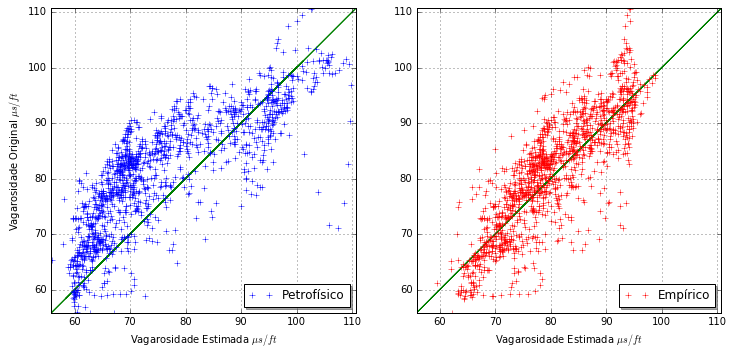

In [6]:
#-----------------------------------------Sonico Estimado-------------------------------------------

siq = "- Siqueira"
aug = "- Augusto"

siqp = name+siq
augp = name+aug

#---------------------------------------------------------------------------------------------------

PHIs = max(PHIsh) #Usar essa porosidade aqui para estimar

DTPs = []

for i in range (p):
    
    DTPs.append(DTPma + (DTPf - DTPma)*((PHItd[i]/100.0) + (VSH[i]*(PHIs/100.0)))) # Sonico (Siqueira & Martins)
    
#---------------------------------------------------------------------------------------------------

ms   = mean(DTPs)
mdtp = mean(DTP)

CS = [] # correlacao Siqueira

SDS  = [] # Desvio Padrao
SDTP = [] # Desvio Padrao

for i in range (p):
    SDS.append ((DTPs[i] - ms)**2)
    SDTP.append((DTP[i]- mdtp)**2)
    
    CS.append((DTPs[i] - ms)*(DTP[i] - mdtp))
    
CS = sum(CS)

CS = CS/p

SDS  = sum(SDS)
SDS  = SDS/p
SDS  = np.sqrt(SDS)

SDTP  = sum(SDTP)
SDTP  = SDTP/p
SDTP  = np.sqrt(SDTP)

CorrS = CS/(SDS*SDTP)

print (CorrS," - Siqueira - coeficiente de correlacao")  


#------------------------------------------------------------------------#

VPa = [] # Vp de augusto

cfvp0 = 3.2808*(10**(-6)) # fator de conversao 

for i in range (p): # determinando VPa em ms
    VPa.append(4.63 - (9.82*PHIe[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) + (4.06*(PHIe[i]/100)*VSH[i]) - (0.22*(PHIe[i]/100)*ILD[i]) + (0.0092*VSH[i]*ILD[i]) + (17.18*((PHIe[i]/100)**2)) + (1.26*(VSH[i]**2)))

DTPa = []
for i in range(p):
    VPa[i] = VPa[i]*1000.000
    #vp = 4.28 -(5.63*PHIe[i]/100)-(2.74*VSH[i])+(9.24*(PHIe[i]/100)*VSH[i])+(6.76*(PHIe[i]/100)**2)+(0.85*VSH[i]**2)
    #DTPa.append(304.8/vp)
    DTPa.append(1.0000/(cfvp0*VPa[i]))

#---------------------------------------------------------------------------------------------------

ma   = mean(DTPa)
mdtp = mean(DTP)

CA = [] # correlacao Augusto

SDA  = [] # Desvio Padrao
SDTP = [] # Desvio Padrao

for i in range (p):
    SDA.append ((DTPa[i] - ma)**2)
    SDTP.append((DTP[i]- mdtp)**2)
    
    CA.append((DTPa[i] - ma)*(DTP[i] - mdtp))
    
CA = sum(CA)

CA = CA/p

SDA  = sum(SDA)
SDA  = SDA/p
SDA  = np.sqrt(SDA)

SDTP  = sum(SDTP)
SDTP  = SDTP/p
SDTP  = np.sqrt(SDTP)

CorrA = CA/(SDA*SDTP)

print (CorrA," - Augusto - coeficiente de correlacao"  )

fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.plot(DTP,DTP,'-g')
ax1.plot(DTPs,DTP,'+b',label='Petrofísico')
legend = ax1.legend(loc=4, shadow=True)
plt.xlim(xmax=max(DTP),xmin=min(DTP))
plt.ylim(ymax=max(DTP),ymin=min(DTP))
plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.ylabel('Vagarosidade Original $\mu s / ft$')
plt.grid()

#------------------------------------#

ax2 = plt.subplot(222)
ax2.plot(DTP,DTP,'-g')
ax2.plot(DTPa,DTP,'+r',label='Empírico')
legend = ax2.legend(loc=4, shadow=True)

plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.xlim(xmax=max(DTP),xmin=min(DTP))
plt.ylim(ymax=max(DTP),ymin=min(DTP))
plt.grid()

plt.show()

#---------------------Impedancia---(transformado de pe pra m)----------------------------
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
    
VPs=[] # velocidade de onda P (Siqueira e Martins)
for i in range(p):
    VPs.append(1.0000/(cfvp*DTPs[i]))
    
#-----------------------------------------Porosidade Sonica--------------------------------------------------

PHIts = []
PHIes = []
gas   = []

DTPsh = DTP[Psh]
for i in range (p):
    
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh - DTPma)/(DTPf - DTPma))))*100.00)
    
#------------------------------------------------------------------------------------------------------------

Gráficos de Dispersão ({\it scatterplos}) do poço RJS0019 comparando o modelo petrofísico (cruz azul), os empíricos (cruz verde) com a vagarosidade original do poço (linha verde).

Todos os perfis do poço RJS-0019 estão completos, o que possibilitou a análise entre os dois modelos. Segundo \citet{Augusto}, a velocidade ($V_{P,A}$) neste poço pode ser definida pela equação:
<br>
<br>
O coeficiente de correlação obtido para este poço foi de $0.80$ para o modelo petrofísico, e de $0.83$ para o modelo empírico, resultado este, mais favorável ao modelo empírico está (muito provavelmente) relacionado a grande quantidade de rochas argilosas do intervalo. Mesmo em tais condições, a correlação pode ser considerada muito boa para ambos os modelos (figura). 

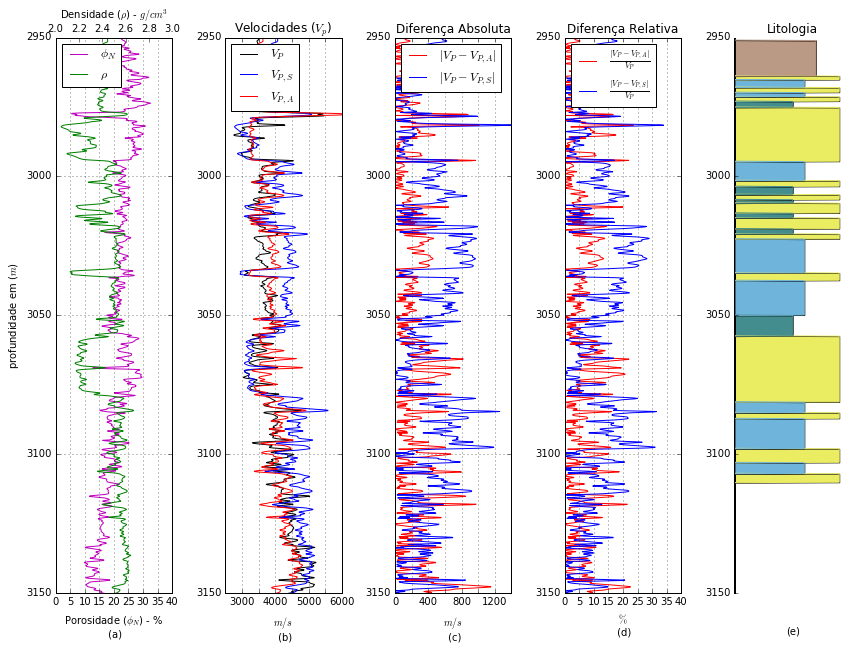

In [7]:
#------------------------diferenca velocidades--------------------------#

difVPVPa = [] # Diferenca absoluta VP - VPa
difVPVPs = [] # Diferenca absoluta VP - VPs

relVPVPa = [] # Diferenca relativa VP - VPa
relVPVPs = [] # Diferenca relativa VP - VPs

for i in range (p):
    difVPVPa.append(np.sqrt((VPa[i] - VP[i])**2))
    difVPVPs.append(np.sqrt((VPs[i] - VP[i])**2))
    
    relVPVPa.append(100.0*np.sqrt((((VP[i] - VPa[i])/VP[i]))**2))
    relVPVPs.append(100.0*np.sqrt((((VP[i] - VPs[i])/VP[i]))**2))

#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
lab1 = ax1.plot(PHIN,prof,'-m',linewidth = 1,label='$\phi_N$')
#lab2 = ax1.plot(PHItd,prof,'-m',linewidth = 1,label='$\phi_{t,D}$')


ax1.set_xlabel('Porosidade ($\phi_N$) - % \n (a)')                    
ax1.set_ylabel('profundidade em ($m$)')

ax0 = ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')

labf = lab1+lab0#+lab2

labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=2)

ax1.set_ylim(ymax=max(prof),ymin=min(prof))

ax0.set_xlim(xmax=3.0,xmin=2.0)
ax1.set_xlim(xmax=40.0,xmin=0.0)

ax1.invert_yaxis()
ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.plot(VP ,prof,'-k',linewidth = 1,label='$V_P$')
ax2.plot(VPs,prof,'-b',linewidth = 1,label='$V_{P,S}$')
ax2.plot(VPa,prof,'-r',linewidth = 1,label='$V_{P,A}$')


ax2.set_title('Velocidades ($V_p$)')                      
ax2.set_xlabel('$m/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.set_xlim(xmax=6000,xmin=2500)
ax2.invert_yaxis()
ax2.grid()

ax2.legend(loc=2)

ax2.set_xticklabels([" ",3000," ",4000," ",5000," ",6000])

#--------------------------------------------------------------------------------------------------#
ax3.plot(difVPVPa,prof,'-r',linewidth = 1,label='$|V_P - V_{P,A}|$') # augusto
ax3.plot(difVPVPs,prof,'-b',linewidth = 1,label='$|V_P - V_{P,S}|$') # siqueira
ax3.set_title('Diferença Absoluta')

ax3.set_xlabel('$m/s$ \n (c)')
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=1400,xmin=0)
ax3.invert_yaxis()
ax3.grid()

ax3.set_xticklabels([0,   " ",   400,   " ",   800,  " ",  1200,  " "])

ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(relVPVPa,prof,'-r',linewidth = 1,label='$\\frac{|V_P - V_{P,A}|}{V_P}$') # augusto
ax4.plot(relVPVPs,prof,'-b',linewidth = 1,label='$\\frac{|V_P - V_{P,S}|}{V_P}$') # siqueira
ax4.set_title('Diferença Relativa')

ax4.set_xlabel('$\%$ \n (d)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=40,xmin=0)
ax4.invert_yaxis()
ax4.grid()

ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(are,prof,'-',linewidth = 1,color='#eaec61')
ax5.plot(sil,prof,'-',linewidth = 1,color='#bb9a85')
ax5.plot(arg,prof,'-',linewidth = 1,color='#438d8e')
ax5.plot(mar,prof,'-',linewidth = 1,color='#6fb5db')


ax5.fill_betweenx(prof, are, facecolor='#eaec61')
ax5.fill_betweenx(prof, arg, facecolor='#438d8e')
ax5.fill_betweenx(prof, sil, facecolor='#bb9a85')
ax5.fill_betweenx(prof, mar, facecolor='#6fb5db')


ax5.set_title('Litologia')                       
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.set_xlim(xmax=100,xmin=0)

ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])

#lab_a = mpatches.Patch(label='Folhelho'    ,color='#438d8e')
#lab_b = mpatches.Patch(label='Siltito'     ,color='#bb9a85')
#lab_c = mpatches.Patch(label='Arenito'     ,color='#eaec61')
#lab_d = mpatches.Patch(label='Marga'       ,color='#bdaebe')
#lab_e = mpatches.Patch(label='Calcilutito' ,color='#6fb5db')

#ax5.legend(handles=[lab_a,lab_b,lab_c,lab_d,lab_e], loc=2, frameon=False)

ax5.set_xlabel('(e)')
ax5.xaxis.set_label_coords(0.5, -0.06)

#--------------------------------------------------------------------------------------------------#

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

#--------------------------------------------------------------------------------------------------#

Perfis de densidade, porosidade e velocidades para o poço RJS0019 . ${\bf (a)}$ Valores dos perfis de densidade $(\rho)$ e porosidade neutrônica $(\phi_N)$ (em vermelho a densidade e em preto a porosidade); ${\bf (b)}$ Comparação das velocidades de ondas P geradas pelos modelos ($V_{P,S}$ e $V_{P,A}$) com a velocidade ($V_{P}$); ${\bf (c)}$ e ${\bf (d)}$ comparam as diferenças, em módulo, dos modelos (absoluta e relativa respectivamente) em relação a $V_P$; ${\bf (e)}$ perfil estratigráfico do poço.

A figura \ref{fnaRJS0019sca} apresenta os motivos deste resultado desfavorável ao modelo petrofísico, onde os valores referentes aos espessos pacotes de calcilutito apresentaram as maiores diferenças entre $V_P$ e $V_{P,A}$. 

In [10]:
#------------------------------------------Impedancia Acustica-----------------------------------#


z_imp = [] # Impedancia acustica (m/s).(g/cm3)
Z     = [] # Impedancia acustica (Km/s).(g/cm3)

z_imp_a = [] # Impedancia acustica Augusto  (m/s).(g/cm3)
z_imp_s = [] # Impedancia acustica Siqueira (m/s).(g/cm3)

Za = [] # Impedancia acustica Augusto (Km/s).(g/cm3)
Zs = [] # Impedancia acustica Siqueira(Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP[i]) # de olho no RHOsi e RHOb
    z_imp.append(z_imp0)
    Z.append(z_imp0*1000.000)
    
    z_imp0a = (RHOsi[i]*VPa[i]) # de olho no RHOsi e RHOb
    z_imp_a.append(z_imp0a)
    Za.append(z_imp0a*1000.000)
    
    z_imp0s = (RHOsi[i]*VPs[i]) # de olho no RHOsi e RHOb
    z_imp_s.append(z_imp0s)
    Zs.append(z_imp0s*1000.000)
    
#--------------------------------Refletividades---------------------

R  = [] # Refletividade
Rs = [] # Refletividade Siqueira
Ra = [] # Refletividade Augusto

for i in range (p):
    if i == 0:
        RR = 0
        RRs= 0
        RRa= 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
        RRs= (z_imp_s[i-1] - z_imp_s[i])/(z_imp_s[i-1] + z_imp_s[i])
        RRa= (z_imp_a[i-1] - z_imp_a[i])/(z_imp_a[i-1] + z_imp_a[i])
    R.append(RR)
    Rs.append(RRs)
    Ra.append(RRa)
    
zero_bar = [0]*p

#---------------------------------------------time c(t)-----------------------------#
DL = prof[3]-prof[2]# valor do intervalo em m

T  = [] #tempo por intervalo padrao
Ts = [] #tempo por intervalo Siqueira
Ta = [] #tempo por intervalo Augusto 

for i in range (p):
    T.append(DL/VP[i])
    Ts.append(DL/VPs[i])
    Ta.append(DL/VPa[i])
    
#---------------------------------------------time c(t)-----------------------------#

# de 1313 elementos, o elemento 657 e central. No pyton, esse elemento e o 656

mp  = int((p-1)/2) # termo central

dtf = [0.0]*mp
dtb = [0.0]*mp

dtfs = [0.0]*mp
dtbs = [0.0]*mp

dtfa = [0.0]*mp
dtba = [0.0]*mp

#----------------------------------------------------#

for i in range (mp):
    dtf[i] = np.mean(T)
    dtb[i] = -(np.mean(T))
    
    dtfs[i] = np.mean(Ts)
    dtbs[i] = -(np.mean(Ts))
    
    dtfa[i] = np.mean(Ta)
    dtba[i] = -(np.mean(Ta))
    
for i in range (1,mp):
    dtf[i]  = dtf[i- 1] + dtf[i]
    dtfs[i] = dtfs[i-1] + dtfs[i]
    dtfa[i] = dtfa[i-1] + dtfa[i]
    
for i in range (1,mp):
    dtb[i]  = dtb[i -1] + dtb[i]
    dtbs[i] = dtbs[i-1] + dtbs[i]
    dtba[i] = dtba[i-1] + dtba[i]
    
dtb.reverse()
dtbs.reverse()
dtba.reverse()

TT  = [0.0]*p
TTs = [0.0]*p
TTa = [0.0]*p

for i in range (len(dtb)):
    TT[i]  = dtb[i]
    TTs[i] = dtbs[i]
    TTa[i] = dtba[i]

for i in range (mp+1,p):
    TT[i]  = dtf[i-mp-1]
    TTs[i] = dtfs[i-mp-1]
    TTa[i] = dtfa[i-mp-1]
    
#wavlet

A = 1.000000
f = 600 #30.000 # 133
ff = str(f) + " - Hz"
j = 400

wav = []
for i in range (len(TT)):
    a = f
    EE1 = -(np.pi**2)*(a**2)*(TT[i]**2)
    wav01 = A*(1 - (2*(np.pi**2)) * (a**2) * (TT[i]**2))*np.exp(EE1) # 2497.55919007
    wav.append(wav01)
    
wavs = []
for i in range (len(TT)):
    EE1s = -(np.pi**2)*(a**2)*(TTs[i]**2)
    wav01s = A*(1 - (2*(np.pi**2)) * (a**2) * (TTs[i]**2))*np.exp(EE1s) # 2497.55919007
    wavs.append(wav01s)
    
wava = []
for i in range (len(TT)):
    EE1a = -(np.pi**2)*(a**2)*(TTa[i]**2)
    wav01a = A*(1 - (2*(np.pi**2)) * (a**2) * (TTa[i]**2))*np.exp(EE1a) # 2497.55919007
    wava.append(wav01a)
    
    


#wavlet

A1 = 1.000000
f1 = 410 #30.000 # 133
ff1 = str(f1) + " - Hz"
j1 = 400

wav1 = []
for i in range (len(TT)):
    a1 = f1
    EE2 = -(np.pi**2)*(a1**2)*(TT[i]**2)
    wav02 = (1 - (2*(np.pi**2)) * (a1**2) * (TT[i]**2))*np.exp(EE2) # 2497.55919007
    wav1.append(wav02)
    
wav1s = []
for i in range (len(TT)):
    EE2s = -(np.pi**2)*(a1**2)*(TTs[i]**2)
    wav02s = (1 - (2*(np.pi**2)) * (a1**2) * (TTs[i]**2))*np.exp(EE2s) # 2497.55919007
    wav1s.append(wav02s)
    
wav1a = []
for i in range (len(TT)):
    EE2a = -(np.pi**2)*(a1**2)*(TTa[i]**2)
    wav02a = (1 - (2*(np.pi**2)) * (a1**2) * (TTa[i]**2))*np.exp(EE2a) # 2497.55919007
    wav1a.append(wav02a)
    
    
#wavlet

A2 = 1.000000
f2 = 220 #30.000 # 133
ff2 = str(f2) + " - Hz"
j2 = 400

wav2 = []
for i in range (len(TT)):
    a2 = f2
    EE3 = -(np.pi**2)*(a2**2)*(TT[i]**2)
    wav03 = (1 - (2*(np.pi**2)) * (a2**2) * (TT[i]**2))*np.exp(EE3) # 2497.55919007
    wav2.append(wav03)
    
wav2s = []
for i in range (len(TT)):
    EE3s = -(np.pi**2)*(a2**2)*(TTs[i]**2)
    wav03s = (1 - (2*(np.pi**2)) * (a2**2) * (TTs[i]**2))*np.exp(EE3s) # 2497.55919007
    wav2s.append(wav03s)
    
wav2a = []
for i in range (len(TT)):
    EE3a = -(np.pi**2)*(a2**2)*(TTa[i]**2)
    wav03a = (1 - (2*(np.pi**2)) * (a2**2) * (TTa[i]**2))*np.exp(EE3a) # 2497.55919007
    wav2a.append(wav03a)
    
#wavlet

A3 = 1.000000
f3 = 30
ff3 = str(f3) + " - Hz" # transforma em string
j3 = 400
print (ff3)

wav3 = []
for i in range (len(TT)):
    a3 = A3*f3
    EE4 = -(np.pi**2)*(a3**2)*(TT[i]**2)
    wav04 = (1 - (2*(np.pi**2)) * (a3**2) * (TT[i]**2))*np.exp(EE4) # 2497.55919007
    wav3.append(wav04)
    
wav3s = []
for i in range (len(TT)):
    a3 = A3*f3
    EE4s = -(np.pi**2)*(a3**2)*(TTs[i]**2)
    wav04s = (1 - (2*(np.pi**2)) * (a3**2) * (TTs[i]**2))*np.exp(EE4s) # 2497.55919007
    wav3s.append(wav04s)
    
wav3a = []
for i in range (len(TT)):
    a3 = A3*f3
    EE4a = -(np.pi**2)*(a3**2)*(TTa[i]**2)
    wav04a = (1 - (2*(np.pi**2)) * (a3**2) * (TTa[i]**2))*np.exp(EE4a) # 2497.55919007
    wav3a.append(wav04a)

30 - Hz


In [11]:
# Convolucao

signal  = np.convolve(R,wav,'same')  # wavlet convolucao Padrao
signals = np.convolve(Rs,wavs,'same') # wavlet convolucao Siqueira
signala = np.convolve(Ra,wava,'same') # wavlet convolucao Augusto

signal1  = np.convolve(R,wav1,'same')  # wavlet convolucao Padrao
signal1s = np.convolve(Rs,wav1s,'same') # wavlet convolucao Siqueira
signal1a = np.convolve(Ra,wav1a,'same') # wavlet convolucao Augusto

signal2  = np.convolve(R,wav2,'same')  # wavlet convolucao Padrao
signal2s = np.convolve(Rs,wav2s,'same') # wavlet convolucao Siqueira
signal2a = np.convolve(Ra,wav2a,'same') # wavlet convolucao Augusto

signal3  = np.convolve(R,wav3,'same')  # wavlet convolucao Padrao
signal3s = np.convolve(Rs,wav3s,'same') # wavlet convolucao Siqueira
signal3a = np.convolve(Ra,wav3a,'same') # wavlet convolucao Augusto

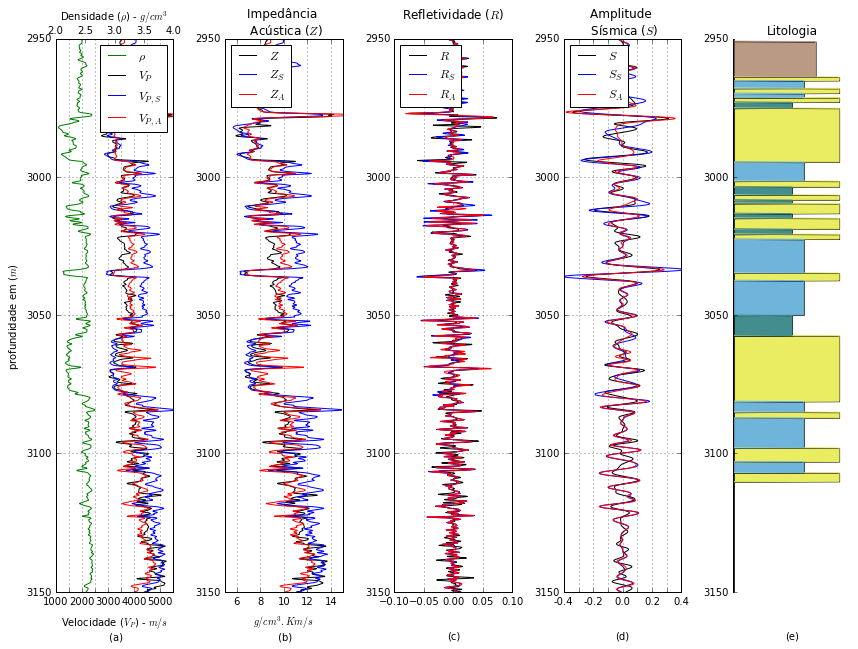

In [13]:
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

#fig.suptitle('', fontsize=12)
fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1 = ax1.plot(PHIN,prof,'-k',linewidth = 1,label='$\phi_N$')


lab1 = ax1.plot(VP ,prof,'-k',linewidth = 1,label='$V_P$')
lab2 = ax1.plot(VPs,prof,'-b',linewidth = 1,label='$V_{P,S}$')
lab3 = ax1.plot(VPa,prof,'-r',linewidth = 1,label='$V_{P,A}$')                    
ax1.set_ylabel('profundidade em ($m$)')

ax0 = ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
ax1.set_xlabel('Velocidade ($V_P$) - $m/s$ \n (a)')

labf = lab0+lab1+lab2+lab3

labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=0)

ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.set_xlim(xmax=5500,xmin=1000)
ax0.set_xlim(xmax=4,xmin=2)

ax1.invert_yaxis()
ax1.grid()

ax1.set_xticklabels([1000," ",2000," ",3000," ",4000," ",5000," "])
#--------------------------------------------------------------------------------------------------#

ax2.plot(z_imp  ,prof,'-k',linewidth = 1,label='$Z$')
ax2.plot(z_imp_s,prof,'-b',linewidth = 1,label='$Z_{S}$')
ax2.plot(z_imp_a,prof,'-r',linewidth = 1,label='$Z_{A}$')         

ax2.set_title('Impedância \n Acústica ($Z$)')                      
ax2.set_xlabel('$g/cm^3 . Km/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.set_xlim(xmax=15,xmin=5)
ax2.invert_yaxis()
ax2.grid()

ax2.legend(loc=2)

#--------------------------------------------------------------------------------------------------#
ax3.plot(R ,prof,'-k',linewidth = 1,label='$R$') 
ax3.plot(Rs,prof,'-b',linewidth = 1,label='$R_{S}$') 
ax3.plot(Ra,prof,'-r',linewidth = 1,label='$R_{A}$') 
ax3.set_title('Refletividade ($R$) \n')
ax3.set_xlabel('(c)')
ax3.xaxis.set_label_coords(0.5, -0.07)

#ax3.set_xlabel('$m/s$')
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1)
ax3.invert_yaxis()
ax3.grid()

ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 1,label='$S$') 
ax4.plot(signals,prof,'-b',linewidth = 1,label='$S_S$')
ax4.plot(signala,prof,'-r',linewidth = 1,label='$S_A$')

ax4.set_title('Amplitude \n Sísmica ($S$)')
ax4.set_xlabel('(d)')
ax4.xaxis.set_label_coords(0.5, -0.07)

#ax4.fill_betweenx(prof, signal,  where=signal >0.0, facecolor='black', alpha=0.1, label="$\phi_e,S$")
#ax4.fill_betweenx(prof, signals, where=signals>0.0, facecolor='blue' , alpha=0.1, label="$\phi_e,S$")
#ax4.fill_betweenx(prof, signala, where=signala>0.0, facecolor='green', alpha=0.1, label="$\phi_e,S$")

ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4)
ax4.invert_yaxis()
ax4.grid()

ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])

ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(are,prof,'-',linewidth = 1,color='#eaec61')
ax5.plot(sil,prof,'-',linewidth = 1,color='#bb9a85')
ax5.plot(arg,prof,'-',linewidth = 1,color='#438d8e')
ax5.plot(mar,prof,'-',linewidth = 1,color='#6fb5db')

ax5.fill_betweenx(prof, are, facecolor='#eaec61')
ax5.fill_betweenx(prof, arg, facecolor='#438d8e')
ax5.fill_betweenx(prof, sil, facecolor='#bb9a85')
ax5.fill_betweenx(prof, mar, facecolor='#6fb5db')

ax5.set_title('Litologia')                       
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.set_xlim(xmax=100,xmin=0)

ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])

lab_a = mpatches.Patch(label='Folhelho'    ,color='#438d8e')
lab_b = mpatches.Patch(label='Siltito'     ,color='#bb9a85')
lab_c = mpatches.Patch(label='Arenito'     ,color='#eaec61')
lab_d = mpatches.Patch(label='Marga'       ,color='#bdaebe')
lab_e = mpatches.Patch(label='Calcilutito' ,color='#6fb5db')

#ax5.legend(handles=[lab_a,lab_b,lab_c,lab_d,lab_e], loc=2, frameon=False)

ax5.set_xlabel('(e)')
ax5.xaxis.set_label_coords(0.5, -0.07)
#-------------------#

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

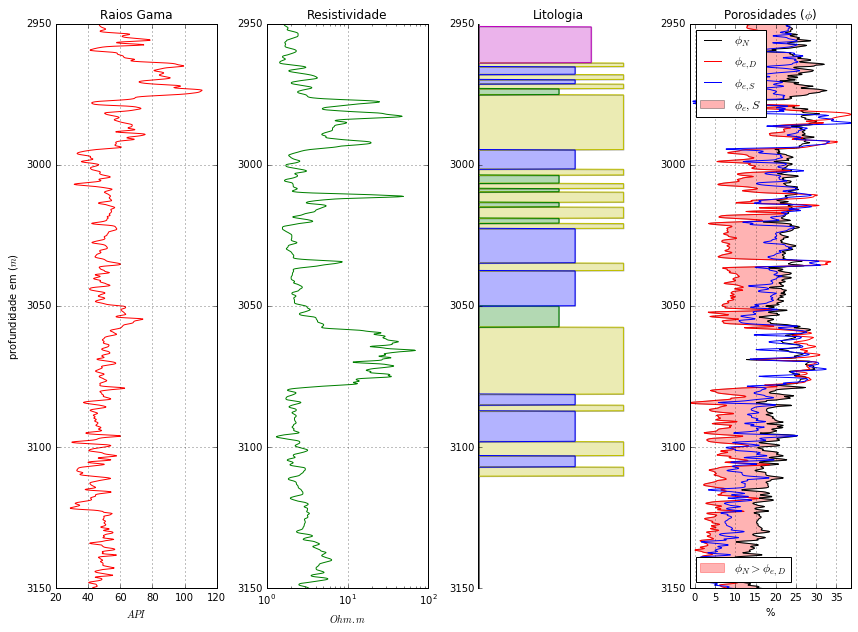

In [14]:
#--------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-r',linewidth = 1)            

ax1.set_title('Raios Gama')                     
ax1.set_xlabel('$API$')                     
ax1.set_ylabel('profundidade em ($m$)')

ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()
#--------------------------------------------------------------------------------------------------#

ax2.semilogx(ILD,prof,'-g',linewidth = 1)            

ax2.set_title('Resistividade')                       
ax2.set_xlabel('$Ohm.m$')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.invert_yaxis()
ax2.grid()

#--------------------------------------------------------------------------------------------------#
ax3.plot(are,prof,'-y',linewidth = 1)
ax3.plot(sil,prof,'-m',linewidth = 1)
ax3.plot(arg,prof,'-g',linewidth = 1)
ax3.plot(mar,prof,'-b',linewidth = 1)

ax3.fill_betweenx(prof, are, facecolor='y', alpha=0.3)
ax3.fill_betweenx(prof, arg, facecolor='g', alpha=0.3)
ax3.fill_betweenx(prof, sil, facecolor='m', alpha=0.3)
ax3.fill_betweenx(prof, mar, facecolor='b', alpha=0.3)

ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=100,xmin=0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax3.yaxis.set_ticks_position('left')

ax3.axes.get_xaxis().set_ticks([])
#--------------------------------------------------------------------------------------------------#
ax4.set_title('Porosidades ($\phi$)')
lab1 = ax4.plot(PHIN,prof, '-k', label="$\phi_N$")
lab2 = ax4.plot(PHIe,prof, '-r', label="$\phi_{e,D}$")
lab3 = ax4.plot(PHIes,prof,'-b', label="$\phi_{e,S}$")
ax4.set_xlabel('%') 

lab4 = mpatches.Patch(label='$\phi_N > \phi_{e,D}$' ,color='r',alpha=0.3) # Gas

ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=max(PHIe),xmin=min(PHIe))
ax4.invert_yaxis()
ax4.fill_betweenx(prof, PHIN, PHIe, where=PHIN>PHIe, facecolor='red', alpha=0.3, label="$\phi_e,S$")

#ax4.legend(loc=2)

ax4.grid()


first_legend = plt.legend( loc=2)
ax4 = plt.gca().add_artist(first_legend)
plt.legend(handles=[lab4], loc=3)

#--------------------------------------------------------------------------------------------------#


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
#---------------------------------Medidas-Estatisticas------------------------------------#
medVP = np.mean(VP) # media
maxVP = max    (VP) # maximo
minVP = min    (VP) # minimo
varVP = np.var (VP) # variancia
stdVP = np.std (VP) # desvio padrao
#----------------------------------------------#
print "-----------valores de VP-------------"
print medVP,"m/s   - media "
print maxVP,"m/s   - valor maximo"
print minVP,"m/s   - valor minimo"
print varVP,"m²/s² - variancia"
print stdVP,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPa = np.mean(VPa) # media
maxVPa = max    (VPa) # maximo
minVPa = min    (VPa) # minimo
varVPa = np.var (VPa) # variancia
stdVPa = np.std (VPa) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPa------------"
print medVPa,"m/s   - media "
print maxVPa,"m/s   - valor maximo"
print minVPa,"m/s   - valor minimo"
print varVPa,"m²/s² - variancia"
print stdVPa,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPs = np.mean(VPs) # media
maxVPs = max    (VPs) # maximo
minVPs = min    (VPs) # minimo
varVPs = np.var (VPs) # variancia
stdVPs = np.std (VPs) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPs------------"
print medVPs,"m/s   - media "
print maxVPs,"m/s   - valor maximo"
print minVPs,"m/s   - valor minimo"
print varVPs,"m²/s² - variancia"
print stdVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro Absoluto------------"
medeaVPVPa = np.mean(difVPVPa) # media
maxeaVPVPa = max    (difVPVPa) # maximo
mineaVPVPa = min    (difVPVPa) # minimo
vareaVPVPa = np.var (difVPVPa) # variancia
stdeaVPVPa = np.std (difVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPa----------"
print medeaVPVPa,"m/s   - media "
print maxeaVPVPa,"m/s   - valor maximo"
print mineaVPVPa,"m/s   - valor minimo"
print vareaVPVPa,"m²/s² - variancia"
print stdeaVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
medeaVPVPs = np.mean(difVPVPs) # media
maxeaVPVPs = max    (difVPVPs) # maximo
mineaVPVPs = min    (difVPVPs) # minimo
vareaVPVPs = np.var (difVPVPs) # variancia
stdeaVPVPs = np.std (difVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPs----------"
print medeaVPVPs,"m/s   - media "
print maxeaVPVPs,"m/s   - valor maximo"
print mineaVPVPs,"m/s   - valor minimo"
print vareaVPVPs,"m²/s² - variancia"
print stdeaVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro relativo------------"
mederVPVPa = np.mean(relVPVPa) # media
maxerVPVPa = max    (relVPVPa) # maximo
minerVPVPa = min    (relVPVPa) # minimo
varerVPVPa = np.var (relVPVPa) # variancia
stderVPVPa = np.std (relVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPa----------"
print mederVPVPa,"m/s   - media "
print maxerVPVPa,"m/s   - valor maximo"
print minerVPVPa,"m/s   - valor minimo"
print varerVPVPa,"m²/s² - variancia"
print stderVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
mederVPVPs = np.mean(relVPVPs) # media
maxerVPVPs = max    (relVPVPs) # maximo
minerVPVPs = min    (relVPVPs) # minimo
varerVPVPs = np.var (relVPVPs) # variancia
stderVPVPs = np.std (relVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPs----------"
print mederVPVPs,"m/s   - media "
print maxerVPVPs,"m/s   - valor maximo"
print minerVPVPs,"m/s   - valor minimo"
print varerVPVPs,"m²/s² - variancia"
print stderVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"


print'\\begin{table}[]'
print'\centering'
print'\caption{Medidas Estatísticas do Poço '+name+'}'
print'\label{est'+name+'}'
print'\\begin{tabular}{|l|l|l|l|l|l|}'
print'\hline'
print'& média & valor máximo & valor mínimo & variância & desvio padrão \\\ \hline'
print'Valores de $V_P$ & '+str(round(medVP,2))+' & '+str(round(maxVP,2))+' & '+str(round(minVP,2))+' & '+str(round(varVP,2))+' & '+str(round(stdVP,2))+' \\\ \hline'
print'Valores de $V_{P,A}$ & '+str(round(medVPa,2))+' & '+str(round(maxVPa,2))+' & '+str(round(minVPa,2))+' & '+str(round(varVPa,2))+' & '+str(round(stdVPa,2))+' \\\ \hline'
print'Valores de $V_{P,S}$ & '+str(round(medVPs,2))+' & '+str(round(maxVPs,2))+' & '+str(round(minVPs,2))+' & '+str(round(varVPs,2))+' & '+str(round(stdVPs,2))+' \\\ \hline'
print'Erro Absoluto $|V_P - V_{P,A}|$ & '+str(round(medeaVPVPa,2))+' & '+str(round(maxeaVPVPa,2))+' & '+str(round(mineaVPVPa,2))+' & '+str(round(vareaVPVPa,2))+' & '+str(round(stdeaVPVPa,2))+' \\\ \hline'
print'Erro Absoluto $|V_P - V_{P,S}|$ & '+str(round(medeaVPVPs,2))+' & '+str(round(maxeaVPVPs,2))+' & '+str(round(mineaVPVPs,2))+' & '+str(round(vareaVPVPs,2))+' & '+str(round(stdeaVPVPs,2))+' \\\ \hline'
print'Erro Relativo $\\frac{|V_P - V_{P,A}|}{V_P}$ & '+str(round(mederVPVPa,2))+' & '+str(round(maxerVPVPa,2))+' & '+str(round(minerVPVPa,2))+' & '+str(round(varerVPVPa,2))+' & '+str(round(stderVPVPa,2))+' \\\ \hline'
print'Erro Relativo $\\frac{|V_P - V_{P,S}|}{V_P}$ & '+str(round(mederVPVPs,2))+' & '+str(round(maxerVPVPs,2))+' & '+str(round(minerVPVPs,2))+' & '+str(round(varerVPVPs,2))+' & '+str(round(stderVPVPs,2))+' \\\ \hline'
print'\end{tabular}'
print'\end{table}'

In [16]:
M  = np.array([[185.0,55.50,96.00,48.100,85.0],
               [1.10,2.650,2.540,2.710,2.56],
               [0.0,1.00,171.00,12.00,59.0],
               [100.0,-0.018,-0.006,0.002,0.24],
               [1,1,1,1,1]],float)

#print M

V = []
for i in range (p):
    r = np.array([DTP[i],RHOb[i],GR[i],PHIN[i],1],float)

    v = np.dot(np.linalg.inv(M),r)
    
    v2 = [0.0]*len(v)
    v3 = [0.0]*len(v)
    for j in range (len(v)):
        v2[j] = v[j]+(min(v)*(-1))
    #print v2
    
    for j in range (len(v)):
        v3[j] = v2[j]/sum(v2)
    
    V.append(v)
    #print v,sum(v)
    

VM = np.array(V)

print (VM[:,0])

#------------------------------------------------------------------------------------------------------------------------#

flu = []
qtz = []
fld = []
cao = []
sha = []
for i in range (p):
    flu.append(VM[i,0] - min(VM[:,0]))
    qtz.append(VM[i,1] - min(VM[:,1]))
    fld.append(VM[i,2] - min(VM[:,2]))
    cao.append(VM[i,3] - min(VM[:,3]))
    sha.append(VM[i,4] - min(VM[:,4]))
  
    
flu_c = [0.0]*p
qtz_c = [0.0]*p
fld_c = [0.0]*p
cao_c = [0.0]*p
sha_c = [0.0]*p

for i in range (p):
    flu_c[i] = flu[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    qtz_c[i] = qtz[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    fld_c[i] = fld[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    cao_c[i] = cao[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    sha_c[i] = sha[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])

calcio  = []
arenito = []
for i in range (p):
    arenito.append(qtz_c[i] + fld_c[i])
    calcio.append(sha_c[i] + cao_c[i] - VSH[i])
    
#------------------------------------------------------------------------------------------------------------------------#

arem2 = [0]*p #are - Areia media
silt2 = [0]*p #sil - silte
shal2 = [0]*p #arg - Argila

calu2 = [0]*p # mar - Calcilutito
marl2 = [0]*p # mao - Marga

for i in range (p):
    if arenito[i] > VSH[i] and arenito[i] > calcio[i] and VSH[i] > calcio[i]:
        silt2[i] = 80
    #---------------------------------------------#
    if arenito[i] > VSH[i] and arenito[i] > calcio[i] and VSH[i] < calcio[i]:
        arem2[i] = 90
    #---------------------------------------------#
    if arenito[i] > VSH[i] and arenito[i] < calcio[i] and VSH[i] < calcio[i]:
        calu2[i] = 60
    #---------------------------------------------#
    if arenito[i] < VSH[i] and arenito[i] > calcio[i] and VSH[i] > calcio[i]:
        silt2[i] = 70
    #---------------------------------------------#
    if arenito[i] < VSH[i] and arenito[i] < calcio[i] and VSH[i] > calcio[i]:
        shal2[i] = 70
    #---------------------------------------------#
    if arenito[i] < VSH[i] and arenito[i] < calcio[i] and VSH[i] < calcio[i]:
        marl2[i] = 70

[ 0.24933212  0.24264764  0.2249071  ...,  0.15255972  0.15663127
  0.16423311]


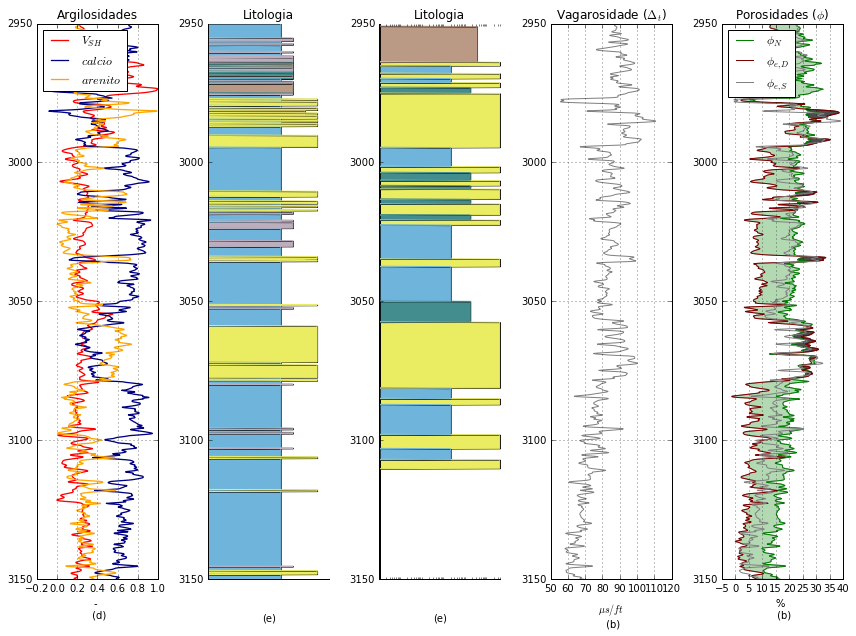

In [17]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
#ax1.plot(sha_c,prof,'-',linewidth = 1.3,color='#6A287E',label='$sha$')
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='red',label='$V_{SH}$')
ax1.plot(calcio,prof,'-',linewidth = 1.3,color='navy',label='$calcio$')
ax1.plot(arenito,prof,'-',linewidth = 1.3,color='orange',label='$arenito$')
ax1.set_title(u'Argilosidades')

ax1.set_xlabel('- \n (d)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()

ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#

ax2.plot(silt2,prof,'-',linewidth = 1,color='#bb9a85')
ax2.plot(shal2,prof,'-',linewidth = 1,color='#438d8e')
ax2.plot(calu2,prof,'-',linewidth = 1,color='#6fb5db')
ax2.plot(arem2,prof,'-',linewidth = 1,color='#eaec61')
ax2.plot(marl2,prof,'-',linewidth = 1,color='#bdaebe')


ax2.fill_betweenx(prof, silt2, facecolor='#bb9a85')
ax2.fill_betweenx(prof, shal2, facecolor='#438d8e')
ax2.fill_betweenx(prof, calu2, facecolor='#6fb5db')
ax2.fill_betweenx(prof, arem2, facecolor='#eaec61')
ax2.fill_betweenx(prof, marl2, facecolor='#bdaebe')

ax2.set_title('Litologia')                       
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.set_xlim(xmax=100,xmin=0)

ax2.invert_yaxis()

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax2.yaxis.set_ticks_position('left')
ax2.axes.get_xaxis().set_ticks([])

ax2.set_xlabel('(e)')
ax2.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61')
ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e')
ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')

ax3.fill_betweenx(prof, arem, facecolor='#eaec61')
ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e')
ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')

ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.4,xmin=0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.axes.get_xaxis().set_ticks([])

ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')


ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (b)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()

#ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIe  ,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e,D}$')
ax5.plot(PHIes ,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e,S}$')

ax5.set_title('Porosidades ($\phi$)')                      
ax5.set_xlabel('% \n (b)')
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis()
ax5.grid()

ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIN>PHIe, facecolor='Green' , alpha=0.3)
ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIe>PHIN, facecolor='Black' , alpha=0.7)

ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

#--------------------------------------------------------------------------------------------------#